In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
from sklearn.datasets import load_wine
dataset = load_wine()
x, y = dataset.data, dataset.target

In [5]:
datasetDataFrame = pd.DataFrame(dataset.data, columns= dataset.feature_names)
datasetDataFrame["target"] = dataset.target
datasetDataFrame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


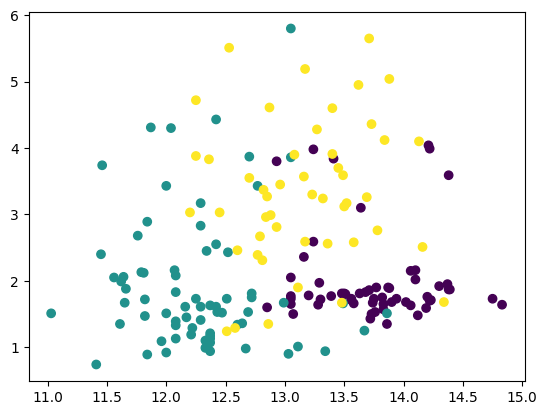

In [31]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

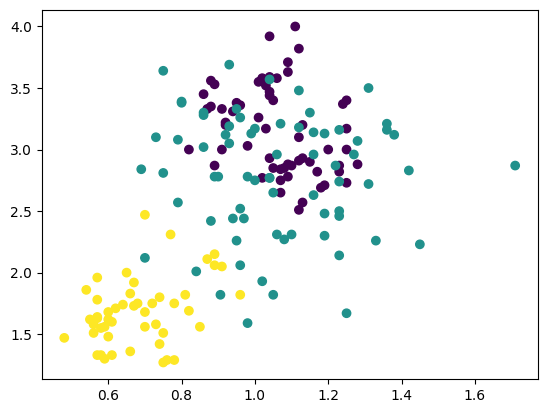

In [35]:
plt.scatter(x[:,10], x[:,11], c=y)
plt.show()

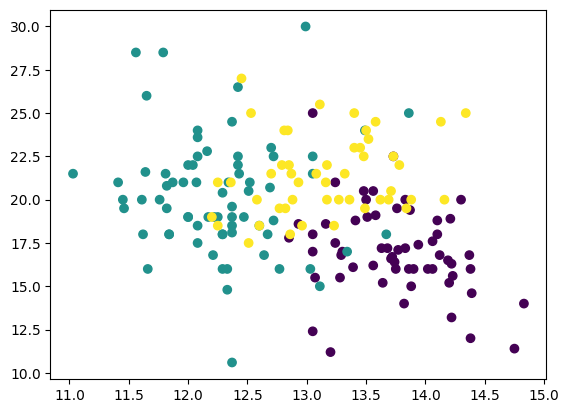

In [34]:
plt.scatter(x[:,0], x[:,3], c=y)
plt.show()

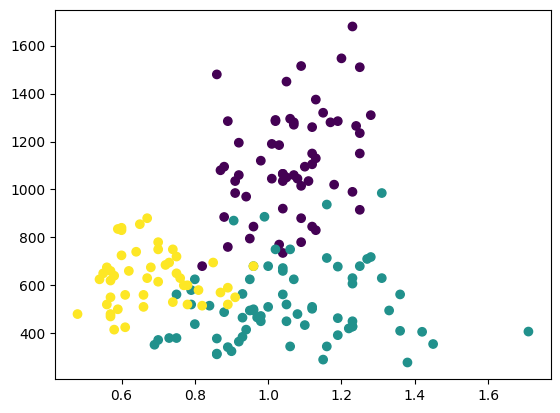

In [38]:
plt.scatter(x[:,10], x[:,12], c=y)
plt.show()

In [6]:
x_entrenamiento, x_pruebas, y_entrenamiento, y_pruebas = train_test_split(x, y, test_size =0.40)

In [26]:
bosque = forest(n_estimators = 1000)
bosque.fit(x_entrenamiento, y_entrenamiento)
y_predichos = bosque.predict(x_pruebas)

In [27]:
resultado = confusion_matrix(y_pruebas, y_predichos)
print(resultado)

[[21  1  0]
 [ 0 28  0]
 [ 0  0 22]]


In [28]:
diagonal = np.trace(resultado)
accuracy = (diagonal / y_pruebas.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

Accuracy: 98.61111111111111%


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


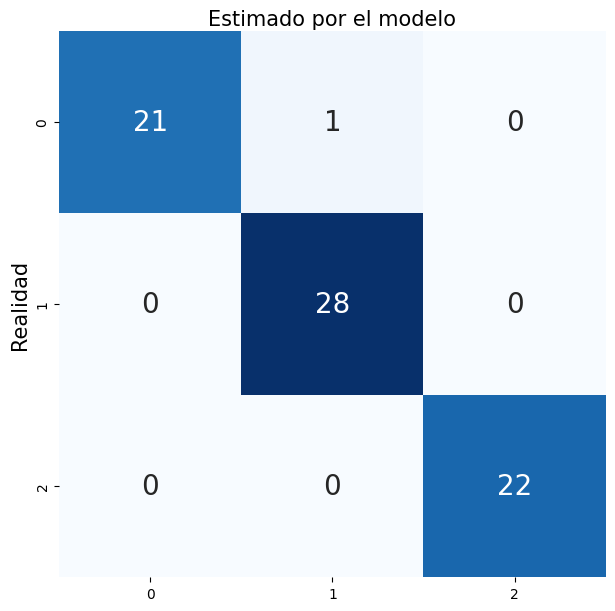

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pd.DataFrame(resultado), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);